# Projet 3 - Stats

In [65]:
import pandas as pd
import numpy as np
import operator
from itertools import product
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

import utils
import projet

In [3]:
cerevisae = utils.read_fasta('sequences/yeast_s_cerevisae_genomic_chr1-4.fna')
len(cerevisae)

4

In [4]:
chromos = [seq for seq in cerevisae.values()]
chromos_flattened = [el for sub in chromos for el in sub]
freqs = utils.nucleotide_count(chromos_flattened)
probas = utils.nucleotide_frequency(chromos_flattened)

In [5]:
len(chromos_flattened)

2515853

In [6]:
nucleotide = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
def logproba(sequence, probas):
    return sum([np.log(probas[nb]) for nb in sequence])

def logprobafast(frequencies):
    return (np.array(frequencies) * np.log(frequencies)).sum() - sum(frequencies)*np.log(sum(frequencies))

In [7]:
logproba(chromos_flattened, probas)

-3438164.462646954

In [8]:
logprobafast(freqs)

-3438164.4626394957

In [9]:
freqs

[754342, 505943, 503163, 752405]

In [10]:
logproba([1, 0, 3], (0.2, 0.3, 0.1, 0.4))

-3.7297014486341915

In [11]:
from functools import reduce

def code(m, k):
    return reduce(lambda p, n: 4*p+n, [nucleotide[c] for c in m])

code('TAC', 3)

49

In [12]:
inv_nucleotide = {str(v):k for k,v in nucleotide.items()}
def str_to_int(string): # str (letters) => list of int
    return [nucleotide[nb] for nb in string]
def int_to_str(sequence): # str (numbers) => str (letters)
    return ''.join([inv_nucleotide[n] for n in sequence])

def inv_code(index, k):
    def func(p, n):
        # p : (str, int) == string so far, remaining index
        # n : (None, int) == _, exponent of 4 for reduction
         return p[0] + str(p[1]//(4**n[1])), p[1] % (4**n[1])
    return int_to_str(reduce(func, [(None, i) for i in range(k-1,-1,-1)], ('', index))[0])

In [13]:
inv_code(49, 3)

'TAC'

In [14]:
inv_nucleotide

{'0': 'A', '1': 'C', '2': 'G', '3': 'T'}

In [15]:
int_to_str('301')

'TAC'

In [116]:
def nb_occurrences(sequence, k):
    dico = {}
    for i in range(len(sequence)-k+1):
        try:
            dico[tuple(sequence[i:i + k])] += 1
        except Exception:
            dico[tuple(sequence[i:i + k])] = 1
    key = lambda item: item[0]
    sorted_dict = {k: v for k,v in sorted(dico.items(), key=key)}
    return sorted_dict

In [148]:
def nbOccu(seq,k):
    words = all_words(k)
    dico = dict(zip(words, [1]*len(words)))
    for i in range(len(seq)-k+1):
        try:
            dico[tuple(seq[i:i + k])] += 1
        except Exception:
            dico[tuple(seq[i:i + k])] = 1
    key = lambda item: item[0]
    sorted_dict = {k: v for k,v in sorted(dico.items(), key=key)}
    return sorted_dict

In [149]:
m = (0.2, 0.3, 0.1, 0.4)
simule_sequence(10,m)

'TTTTTATTAA'

In [150]:
def all_words(k, seq = range(0,4)):
    return list(product(seq, repeat=k))

In [151]:
def comptage_attendu(k, length, frequences):
    words = all_words(k)
    v = length-k+1
    dico = dict(zip(words, [1]*len(words)))
    for k in dico.keys():
        dico[k] = reduce(operator.mul, (frequences[i] for i in k))
        dico[k] *= v
    return dico

In [160]:
comptage_attendu(8,len(chromos_flattened),probas)

{(0, 0, 0, 0, 0, 0, 0, 0): 164.34188703192117,
 (0, 0, 0, 0, 0, 0, 0, 1): 110.22537171547029,
 (0, 0, 0, 0, 0, 0, 0, 2): 109.61971745526903,
 (0, 0, 0, 0, 0, 0, 0, 3): 163.9198898009824,
 (0, 0, 0, 0, 0, 0, 1, 0): 110.2253717154703,
 (0, 0, 0, 0, 0, 0, 1, 1): 73.92900732272655,
 (0, 0, 0, 0, 0, 0, 1, 2): 73.5227903371033,
 (0, 0, 0, 0, 0, 0, 1, 3): 109.94233491649467,
 (0, 0, 0, 0, 0, 0, 2, 0): 109.61971745526903,
 (0, 0, 0, 0, 0, 0, 2, 1): 73.5227903371033,
 (0, 0, 0, 0, 0, 0, 2, 2): 73.11880538793483,
 (0, 0, 0, 0, 0, 0, 2, 3): 109.33823585579445,
 (0, 0, 0, 0, 0, 0, 3, 0): 163.9198898009824,
 (0, 0, 0, 0, 0, 0, 3, 1): 109.94233491649467,
 (0, 0, 0, 0, 0, 0, 3, 2): 109.33823585579445,
 (0, 0, 0, 0, 0, 0, 3, 3): 163.4989761748758,
 (0, 0, 0, 0, 0, 1, 0, 0): 110.2253717154703,
 (0, 0, 0, 0, 0, 1, 0, 1): 73.92900732272655,
 (0, 0, 0, 0, 0, 1, 0, 2): 73.5227903371033,
 (0, 0, 0, 0, 0, 1, 0, 3): 109.94233491649467,
 (0, 0, 0, 0, 0, 1, 1, 0): 73.92900732272655,
 (0, 0, 0, 0, 0, 1, 1, 1): 4

In [159]:
nbOccu(chromos_flattened,8)

{(0, 0, 0, 0, 0, 0, 0, 0): 13,
 (0, 0, 0, 0, 0, 0, 0, 1): 87,
 (0, 0, 0, 0, 0, 0, 0, 2): 57,
 (0, 0, 0, 0, 0, 0, 0, 3): 22,
 (0, 0, 0, 0, 0, 0, 1, 0): 84,
 (0, 0, 0, 0, 0, 0, 1, 1): 86,
 (0, 0, 0, 0, 0, 0, 1, 2): 73,
 (0, 0, 0, 0, 0, 0, 1, 3): 103,
 (0, 0, 0, 0, 0, 0, 2, 0): 102,
 (0, 0, 0, 0, 0, 0, 2, 1): 79,
 (0, 0, 0, 0, 0, 0, 2, 2): 98,
 (0, 0, 0, 0, 0, 0, 2, 3): 116,
 (0, 0, 0, 0, 0, 0, 3, 0): 57,
 (0, 0, 0, 0, 0, 0, 3, 1): 86,
 (0, 0, 0, 0, 0, 0, 3, 2): 87,
 (0, 0, 0, 0, 0, 0, 3, 3): 50,
 (0, 0, 0, 0, 0, 1, 0, 0): 126,
 (0, 0, 0, 0, 0, 1, 0, 1): 83,
 (0, 0, 0, 0, 0, 1, 0, 2): 86,
 (0, 0, 0, 0, 0, 1, 0, 3): 117,
 (0, 0, 0, 0, 0, 1, 1, 0): 116,
 (0, 0, 0, 0, 0, 1, 1, 1): 64,
 (0, 0, 0, 0, 0, 1, 1, 2): 38,
 (0, 0, 0, 0, 0, 1, 1, 3): 88,
 (0, 0, 0, 0, 0, 1, 2, 0): 92,
 (0, 0, 0, 0, 0, 1, 2, 1): 45,
 (0, 0, 0, 0, 0, 1, 2, 2): 49,
 (0, 0, 0, 0, 0, 1, 2, 3): 66,
 (0, 0, 0, 0, 0, 1, 3, 0): 106,
 (0, 0, 0, 0, 0, 1, 3, 1): 96,
 (0, 0, 0, 0, 0, 1, 3, 2): 95,
 (0, 0, 0, 0, 0, 1, 3, 3): 133,


## Graphique 2D

In [188]:

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

def plot(file):
    f = utils.read_fasta(file)
    chromos = [seq for seq in f.values()]
    chromos_flattened = [el for sub in chromos for el in sub]
    probas = utils.nucleotide_frequency(chromos_flattened)
    attendu = nbOccu(chromos_flattened,2)
    observe = comptage_attendu(2,len(chromos_flattened),probas)
    fig, ax = plt.subplots()
    ax.grid(True)
    plt.xlabel("Nombre attendu")
    plt.ylabel("Nombre observe")
    ax.scatter(list(attendu.values()), list(observe.values()), c="red", marker="x")
    print(np.max([ax.get_xlim(), ax.get_ylim()]))
    x = np.linspace(np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()]))
    ax.plot(x,x)
    plt.show()

In [189]:
files = ["sequences/regulatory_seqs_MET.fasta","sequences/regulatory_seq_PHO.fasta","sequences/regulatory_seqs_GAL.fasta"]

874.0598566308245


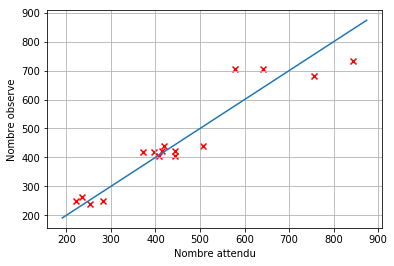

In [190]:
plot(files[0])